# Overview #

The objective of this task is to build a model that predicts the type of wine (red or white).

# Import libraries & define some variables #

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

TRAIN_DATASET = os.path.join('winequality.csv')

# Data Inspection and Preprocessing #

In [2]:
data = pd.read_csv(TRAIN_DATASET)
df = data.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


## One-Hot Encoding ##

`type` values will be one-hot encoded. `white` will be represented by 1 while `red` will be represented by 0.

In [4]:
type_map = {'white': 1, 'red': 0}
df['type'] = df['type'].map(type_map)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,1
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,1
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,1
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,1
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,1


# Exploratory Data Analysis #

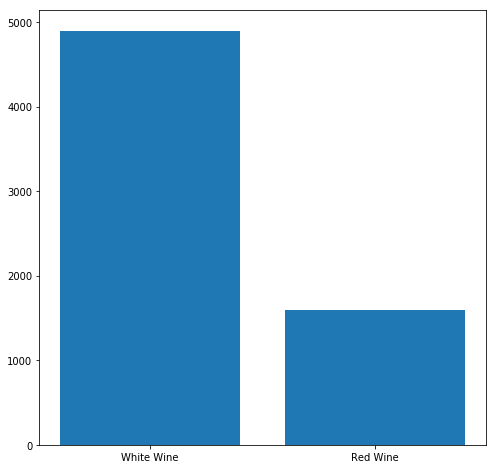

In [5]:
white_wine = np.array(df[df['type'] == 1])
red_wine = np.array(df[df['type'] == 0])

plt.figure(figsize=(8, 8))
plt.bar(x=[1, 2], height=[white_wine.shape[0], red_wine.shape[0]], tick_label=['White Wine', 'Red Wine'])
plt.show()

Most of the wine in the dataset are white. This is important when dividing the dataset into training and testing sets.

Studying the correlation between the features will give an idea of what features really affect wine quality positively or negatively.

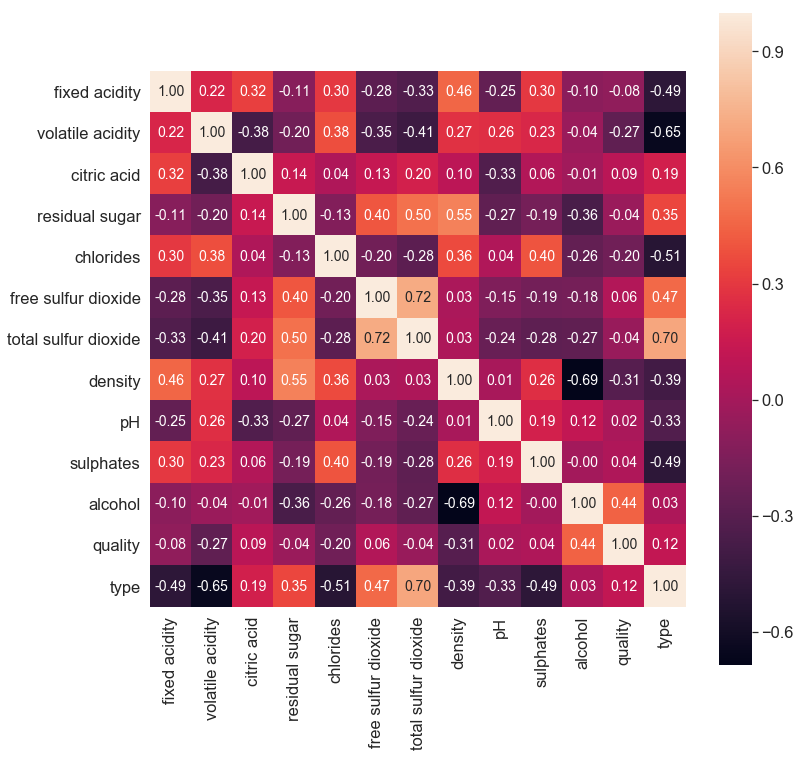

In [6]:
def heatmap(df):
    plt.figure(figsize=(12, 12))
    sns.set(font_scale=1.5)
    sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 14}, yticklabels=df.columns, 
                xticklabels=df.columns)
    plt.show()
    
heatmap(df)

We will exam features with strong correlation (>=0.45) between them.

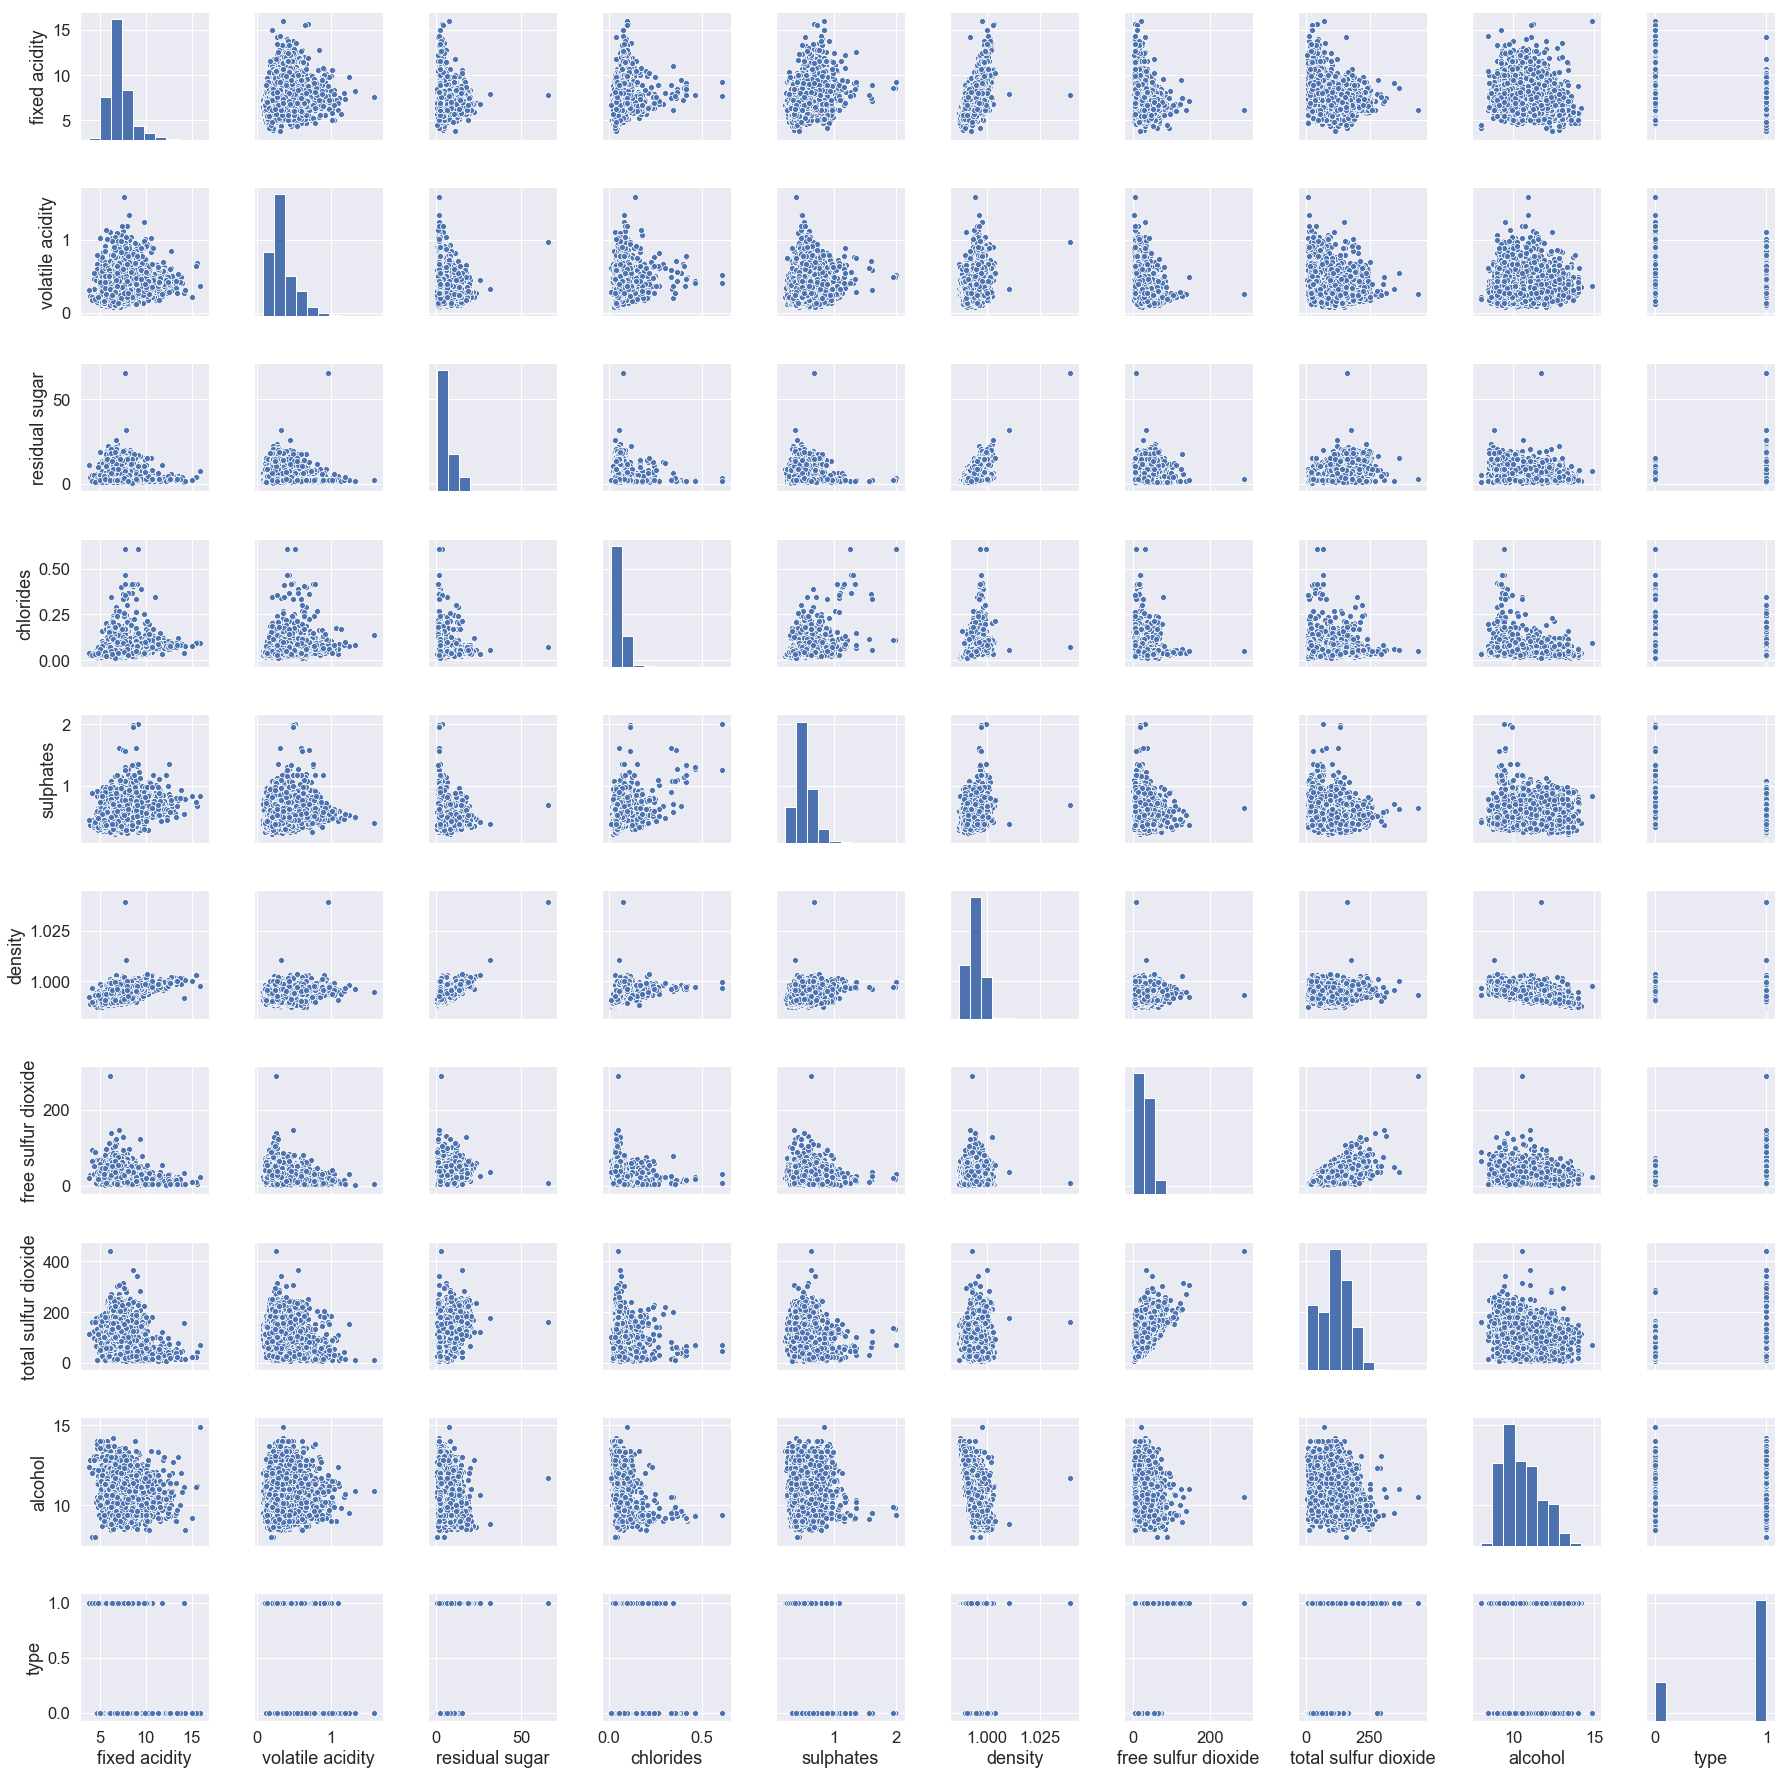

In [7]:
corr_cols = ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'sulphates', 'density', 
             'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'type']

def pairplot(cols):
    sns.pairplot(df[cols])
    plt.show()
    
pairplot(corr_cols)

# Looking out for outliers #

The approach to be applied to looking for outliers will be to compare correlations between features and view the plot of points between these correlations. Correlation values greater than 0.45 and have "eye-balled" outliers from the pairplot will be analyzed.

In [8]:
from scipy import stats
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import polyfit
import random

def plot_relationship_best_fit(x_axis, x_label, y_axis, y_label, best_fit='linear'):
    fit = None
    
    if best_fit == 'linear':
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_axis, y_axis)
        fit = slope * x_axis + intercept
    
    if best_fit == 'quadratic':
        popt, pcov = curve_fit(func, x_axis, y_axis)
        fit = func(x_axis, *popt)
        
    np.random.seed(42)
    r = random.randint(0, len(x_axis)-1)
    
    plt.figure(figsize=(8,8))    
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, fit, color='r')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def func(x, a, b, c):
    return a*(x**2) + b*x + c

In [9]:
def corr_plot(x_axis, x_label, y_axis, y_label, title=None, legend=None):
    plt.figure(figsize=(8, 8))
    plt.scatter(x_axis, y_axis)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

#### Fixed Acidity vs Density ####

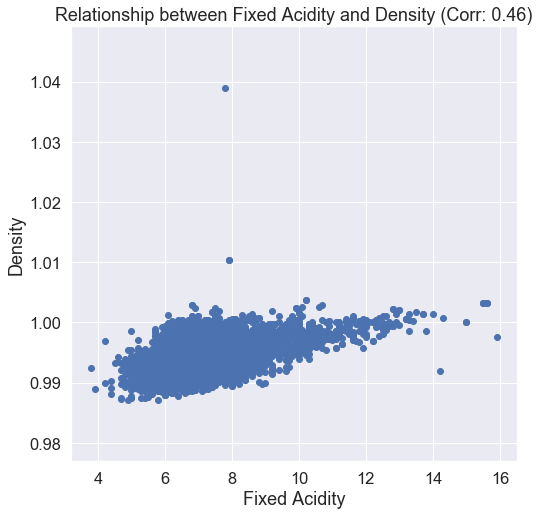

In [10]:
corr = 'Corr: %.2f' % df['fixed acidity'].corr(df['density'])
corr_plot(df['fixed acidity'], 'Fixed Acidity', df['density'], 'Density', 
          'Relationship between Fixed Acidity and Density ({})'.format(corr))

Densities greater than 1.01 will be removed from the dataset.

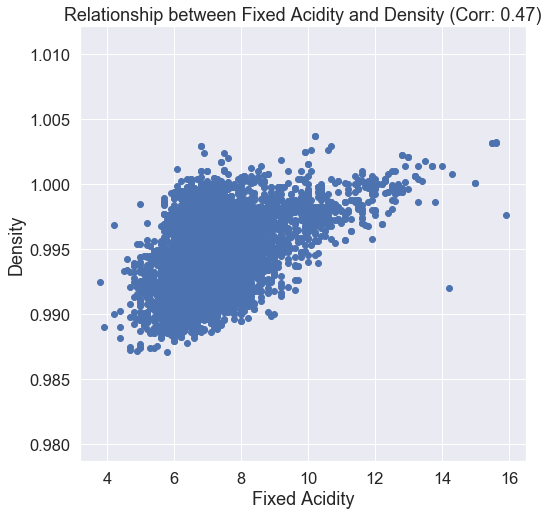

In [11]:
df = df[df['density'] < 1.01]

corr = 'Corr: %.2f' % df['fixed acidity'].corr(df['density'])
corr_plot(df['fixed acidity'], 'Fixed Acidity', df['density'], 'Density', 
          'Relationship between Fixed Acidity and Density ({})'.format(corr))

#### Residual Sugar vs Total Sulfur Dioxide ####

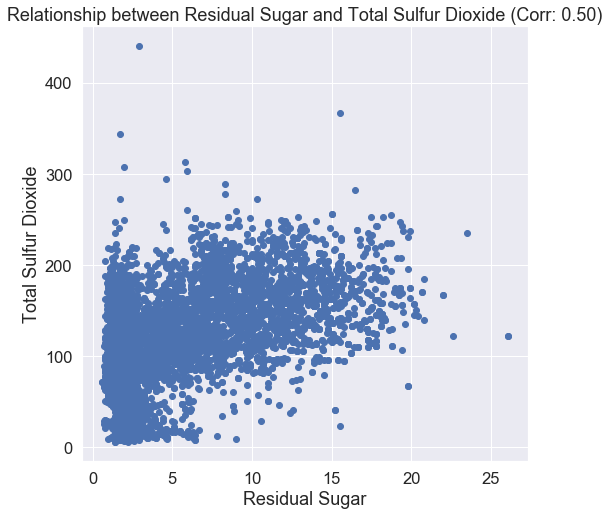

In [12]:
corr = 'Corr: %.2f' % df['residual sugar'].corr(df['total sulfur dioxide'])
corr_plot(df['residual sugar'], 'Residual Sugar', df['total sulfur dioxide'], 'Total Sulfur Dioxide', 
          'Relationship between Residual Sugar and Total Sulfur Dioxide ({})'.format(corr))

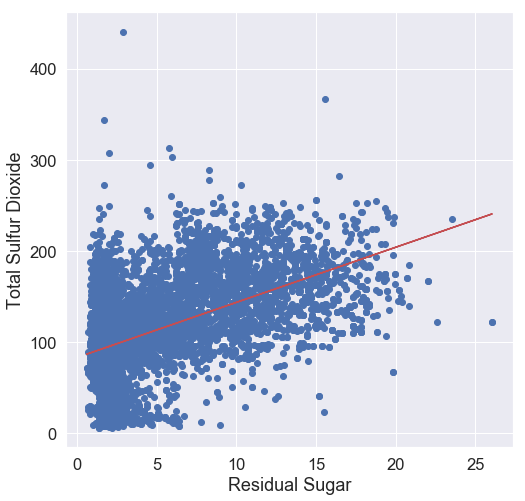

In [13]:
plot_relationship_best_fit(df['residual sugar'], 'Residual Sugar', df['total sulfur dioxide'], 'Total Sulfur Dioxide')

Total sulfur dioxide greater than 300 and residual sugar greater than 22 will be removed.

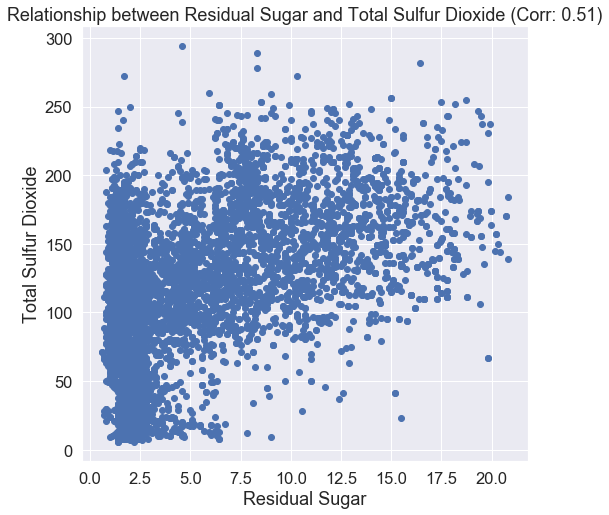

In [14]:
df = df[df['total sulfur dioxide'] < 300]
df = df[df['residual sugar'] < 22]

corr = 'Corr: %.2f' % df['residual sugar'].corr(df['total sulfur dioxide'])
corr_plot(df['residual sugar'], 'Residual Sugar', df['total sulfur dioxide'], 'Total Sulfur Dioxide', 
          'Relationship between Residual Sugar and Total Sulfur Dioxide ({})'.format(corr))

#### Residual Sugar vs Density ####

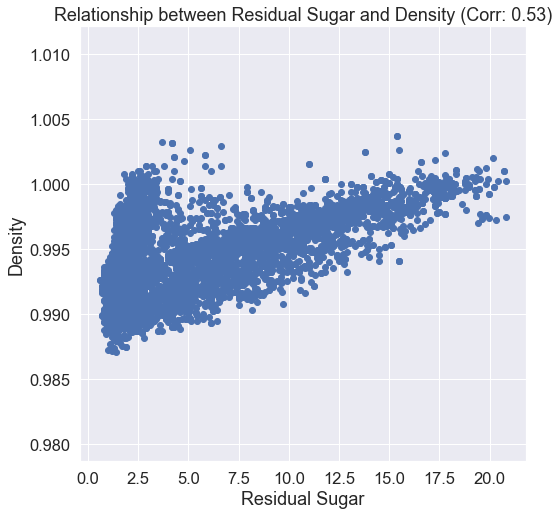

In [15]:
corr = 'Corr: %.2f' % df['residual sugar'].corr(df['density'])
corr_plot(df['residual sugar'], 'Residual Sugar', df['density'], 'Density', 
          'Relationship between Residual Sugar and Density ({})'.format(corr))

#### Free Sulfur Dioxide & Total Sulfur Dioxide ####

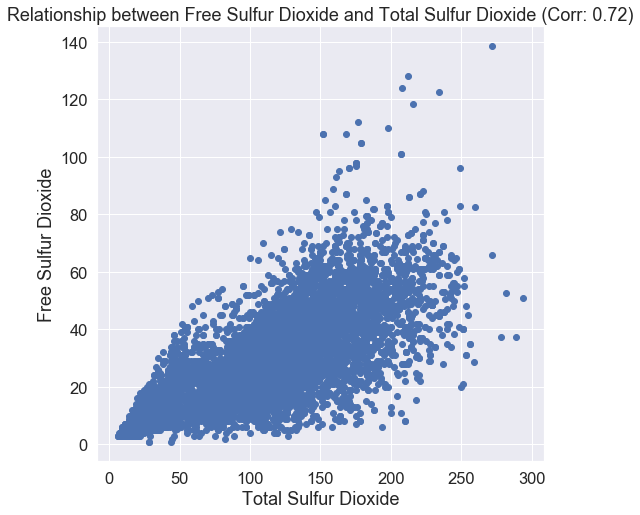

In [16]:
corr = 'Corr: %.2f' % df['free sulfur dioxide'].corr(df['total sulfur dioxide'])
corr_plot(df['total sulfur dioxide'], 'Total Sulfur Dioxide', df['free sulfur dioxide'], 'Free Sulfur Dioxide', 
          'Relationship between Free Sulfur Dioxide and Total Sulfur Dioxide ({})'.format(corr))

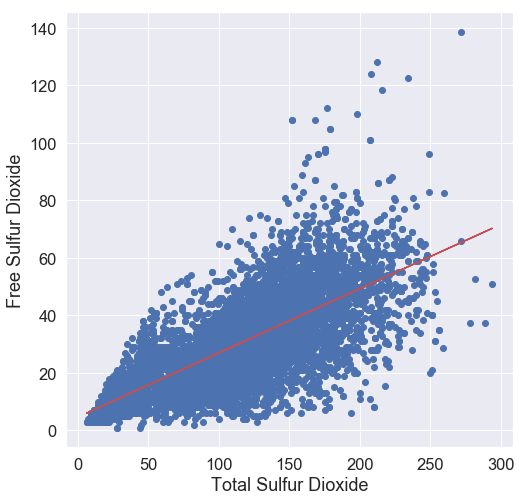

In [17]:
plot_relationship_best_fit(df['total sulfur dioxide'], 'Total Sulfur Dioxide', df['free sulfur dioxide'], 
                           'Free Sulfur Dioxide')

Free sulfur dioxide greater than 100 will be removed.

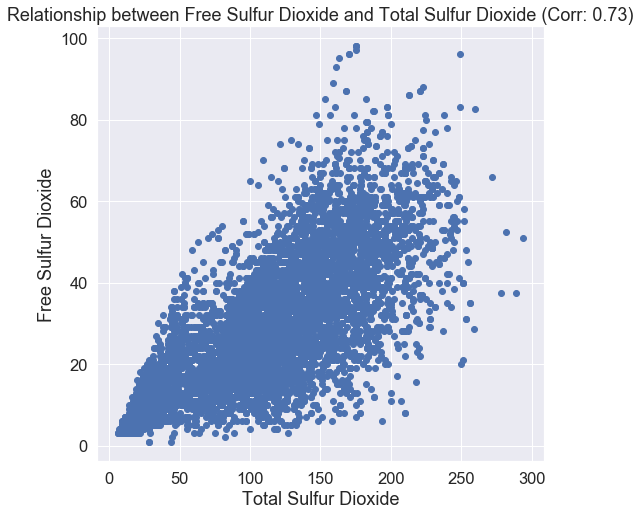

In [18]:
df = df[df['free sulfur dioxide'] < 100]

corr = 'Corr: %.2f' % df['free sulfur dioxide'].corr(df['total sulfur dioxide'])
corr_plot(df['total sulfur dioxide'], 'Total Sulfur Dioxide', df['free sulfur dioxide'], 'Free Sulfur Dioxide', 
          'Relationship between Free Sulfur Dioxide and Total Sulfur Dioxide ({})'.format(corr))

#### Density vs Alcohol ####

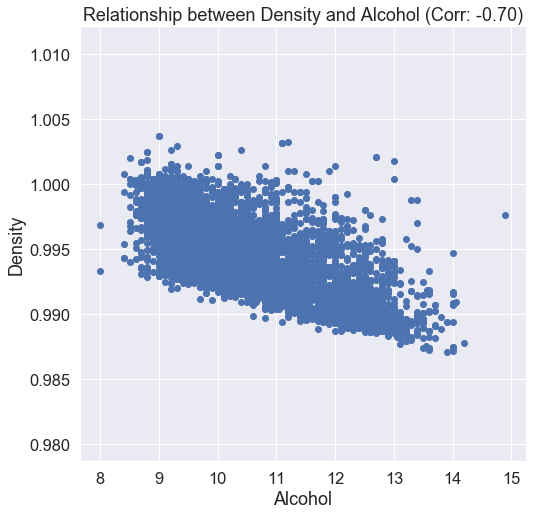

In [19]:
corr = 'Corr: %.2f' % df['density'].corr(df['alcohol'])
corr_plot(df['alcohol'], 'Alcohol', df['density'], 'Density', 
          'Relationship between Density and Alcohol ({})'.format(corr))

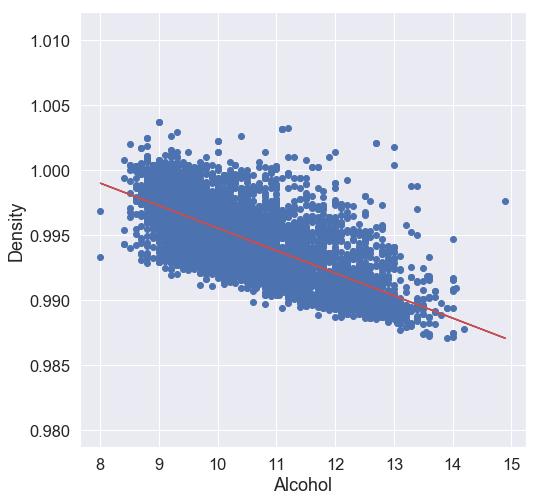

In [20]:
plot_relationship_best_fit(df['alcohol'], 'Alcohol', df['density'], 'Density')

Alcohol greater than 14.5 will be excluded.

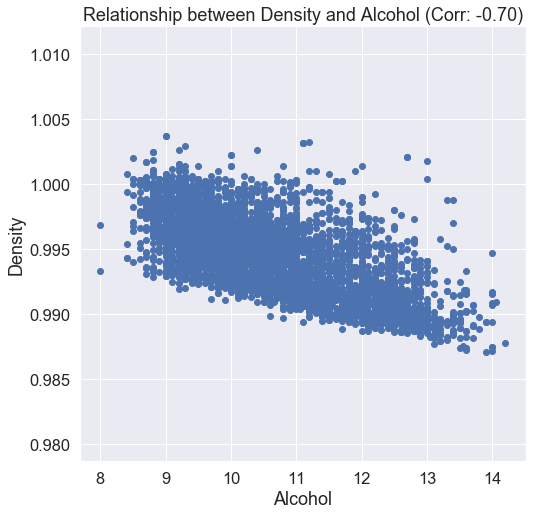

In [21]:
df = df[df['alcohol'] < 14.5]

corr = 'Corr: %.2f' % df['density'].corr(df['alcohol'])
corr_plot(df['alcohol'], 'Alcohol', df['density'], 'Density', 
          'Relationship between Density and Alcohol ({})'.format(corr))

In [22]:
df.shape

(6467, 13)

# Feature Engineering #

Features will be engineered to create new features based on the relationship between the features and their correlation. From research, total acidity is made up of fixed acidity and volatile acidity. These features will be combined to one feature. Features that have a correlation greater than 0.4 will be combined to form new features.

In [23]:
df['total acidity'] = df['fixed acidity'] + df['volatile acidity']
df['fixed acidity density'] = df ['fixed acidity'] * df['density']
df['fixed acidity type'] = df['fixed acidity'] * df['type']
df['volatile acidity total sulfur dioxide'] = df['volatile acidity']  * df['total sulfur dioxide']
df['volatile acidity type'] = df['volatile acidity'] * df['type']
df['residual sugar free sulfur dioxide'] = df['residual sugar'] * df['free sulfur dioxide']
df['residual sugar total sulfur dioxide'] = df['residual sugar'] * df['total sulfur dioxide']
df['residual sugar density'] = df['residual sugar'] * df['density']
df['chlorides sulphates'] = df['chlorides'] * df['sulphates']
df['chlorides type'] = df['chlorides'] * df['type']
df['free sulfur dioxide total sulfur dioxide'] = df['free sulfur dioxide'] * df['total sulfur dioxide']
df['free sulfur dioxide type'] = df['free sulfur dioxide'] * df['type']
df['total sulfur dioxide type'] = df['total sulfur dioxide'] * df['type']
df['alcohol density'] = df['density'] * df['alcohol']
df['sulphates type'] = df['sulphates'] * df['type']
df['alcohol quality'] = df['alcohol'] * df['quality']

df.drop(['fixed acidity', 'volatile acidity', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 
         'alcohol', 'residual sugar', 'chlorides', 'sulphates'], axis=1, inplace=True)
df = df.reset_index(drop=True)

df.shape

(6467, 20)

In [24]:
random_state = 42
target = df['type']
features = df.drop('type', axis=1)
features.shape

(6467, 19)

# Feature Scaling #

With outliers removed, the dataset will be scaled using the `StandardScaler` class. But first the data will be split into training and testing sets with a ration of 70% to 30%.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=random_state, 
                                                    stratify=target)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4526, 19)
(1941, 19)
(4526,)
(1941,)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\leety\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\leety\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\leety\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


# Train model #

The model will be trained using a neural network architecture and will be evaluated using the `accuracy`. The Keras library will be used in developing the neural network architecture, compiling, training, evaluating the model and predicting wine quality. The architecture is made up of the input layer, 8 hidden layer and the output/prediction layer. Dropout is applied to the hidden layers to avoid overfitting.

In [28]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dense(218))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(218))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                640       
_________________________________________________________________
activation_10 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 218)               7194      
_________________________________________________________________
dropout_8 (Dropout)          (None, 218)               0         
_________________________________________________________________
activation_11 (Activation)   (None, 218)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               112128    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
__________

Early stopping will be used to stop the training once there is no change in the loss. The training will stop if there is no change in loss after 20 iterations. Because of the size of the dataset, the test data will be used for validation. The model does not train on the test data.

In [ ]:
early_stopping = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=.3, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

Train on 4526 samples, validate on 1941 samples
Epoch 1/1000
4526/4526 [==============================] - 9s 2ms/step - loss: 0.0868 - acc: 0.9792 - val_loss: 5.6762e-07 - val_acc: 1.0000
Epoch 2/1000
4526/4526 [==============================] - 6s 1ms/step - loss: 0.0053 - acc: 0.9993 - val_loss: 1.1446e-07 - val_acc: 1.0000
Epoch 3/1000
4526/4526 [==============================] - 6s 1ms/step - loss: 0.0070 - acc: 0.9996 - val_loss: 1.1446e-07 - val_acc: 1.0000
Epoch 4/1000
4526/4526 [==============================] - 6s 1ms/step - loss: 1.1520e-07 - acc: 1.0000 - val_loss: 1.1446e-07 - val_acc: 1.0000
Epoch 5/1000
4526/4526 [==============================] - 6s 1ms/step - loss: 1.1799e-07 - acc: 1.0000 - val_loss: 1.1446e-07 - val_acc: 1.0000
Epoch 6/1000
4526/4526 [==============================] - 6s 1ms/step - loss: 0.0121 - acc: 0.9991 - val_loss: 1.1446e-07 - val_acc: 1.0000
Epoch 7/1000
4526/4526 [==============================] - 6s 1ms/step - loss: 1.1446e-07 - acc: 1.0000 -

# Visualize Training Errors #

In [ ]:
def plot_error(train_errors, val_errors, xlabel, ylabel, title=None, legend=None):
    plt.figure(figsize=(8, 8))
    plt.plot(train_errors)
    plt.plot(val_errors)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(legend, loc='best')
    plt.show()

In [ ]:
# Plot training & validation loss values
plot_error(history.history['loss'], history.history['val_loss'], 'Epoch', 'Loss', 'Model Loss', ['Train', 'Validation'])

In [ ]:
# Plot training & validation accuracy values
plot_error(history.history['acc'], history.history['val_acc'], 'Epoch', 'Accuracy', 'Model Accuracy', ['Train', 'Validation'])

# Make predictions #

Predictions will be rounded to their nearest units so as to easily compare with the test dataset's wine quality. The neural network predictions are returned as an array of arrays. These will be reshaped to a 1D array of predictions so that they can be compared with their ground-truth values (`y_test`).

In [ ]:
predictions = model.predict(X_test)
predictions = np.reshape(predictions, predictions.shape[0])
predictions = predictions.astype('int')

# Evaluate the model #

In [33]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('Score: %.3f' % score)

Score: 1.000


The plot below compares the predictions of the model with the corresponding ground-truth values.

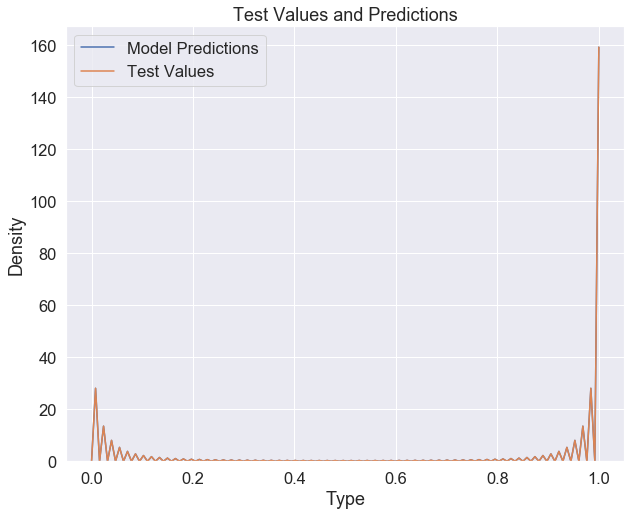

In [34]:
def evaluation_plot(y_test, predictions):
    plt.figure(figsize=(10, 8))

    # Density plot of the final predictions and the test values
    sns.kdeplot(predictions, label='Model Predictions')
    sns.kdeplot(y_test, label='Test Values')

    # Label the plot
    plt.xlabel('Type')
    plt.ylabel('Density')
    plt.title('Test Values and Predictions')
    plt.show()

evaluation_plot(y_test, predictions)